# Working to Filter out only Vital Signs

#### Vital signs are measurements of the body's most basic functions. The four main vital signs  include the following:

Body temperature
Pulse rate
Respiration rate (rate of breathing)
Blood pressure (Blood pressure is not considered a vital sign, but is often measured along with the vital signs.)

Vital signs are useful in detecting or monitoring medical problems. Vital signs can be measured in a medical setting, at home, at the site of a medical emergency, or elsewhere.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [240]:
chunks = pd.read_csv(r"C:\Users\Maaz Tahir\DataScienceFiles\PGD_Theseis_MIMIC\MIMIC2csv\chartevents.csv", usecols = ["subject_id", "charttime" ,"icustay_id", "itemid", "value1num", "value1uom", "value2num" , "value2uom"], chunksize=100000)

In [241]:
elist = []

for chunk in chunks:
    elist.append(chunk)
    
chart = pd.concat(elist)

In [242]:
chart.head(5)

,subject_id,icustay_id,itemid,charttime,value1num,value1uom,value2num,value2uom
0,56,62.0,926,17/1/2644 02:02:00,NaN,NaN,NaN,NaN
1,56,62.0,920,17/1/2644 02:02:00,NaN,NaN,NaN,NaN
2,56,62.0,69,17/1/2644 02:02:00,NaN,NaN,NaN,NaN
3,56,62.0,762,17/1/2644 02:02:00,NaN,NaN,NaN,NaN
4,56,62.0,919,17/1/2644 02:02:00,NaN,NaN,NaN,NaN


In [245]:
chart.tail(5)

,subject_id,icustay_id,itemid,charttime,value1num,value1uom,value2num,value2uom
34240616,32763,47473.0,211,9/7/2724 13:45:00,0.0,BPM,NaN,NaN
34240617,32763,47473.0,20009,9/7/2724 15:10:59,5.0,NaN,NaN,NaN
34240618,32763,47473.0,20008,9/7/2724 15:10:59,0.0,NaN,NaN,NaN
34240619,32763,47473.0,20006,9/7/2724 15:10:59,1.0,NaN,NaN,NaN
34240620,32763,47473.0,20007,9/7/2724 15:10:59,4.0,NaN,NaN,NaN


In [246]:
chart.shape

(34240621, 8)

In [253]:
unique = chart["subject_id"].unique()

In [255]:
# unique

In [10]:
def datetimeconverter(x):

    a = x.split(" ")

    date = a[0]
    time = a[1]

    day = date.split("/")[0]
    month = date.split("/")[1]
    year = date.split("/")[2]


    if len(month)==1:
        month = "0"+month

    else:
        month
        
        
    if len(day)==1:
        day = "0"+day
        
    else:
        day

    new_date = year+"-"+month+"-"+day
    
    new_datetime = new_date+" "+time
    
    np_datetime = np.datetime64(new_datetime)
    
    return np_datetime

# Temperature

#### Normal body temperature can range from 97.8 degrees F (or Fahrenheit, equivalent to 36.5 degrees C, or Celsius) to 99 degrees F (37.2 degrees C) for a healthy adult.

#### Code is 678

According to the document, 678 is the Temperature in Fahrenheit. We will filter out the results based on the 
earliest icu stay id and charrtime. To be extra sure we will convert charttime into numpy datetime, so when sorting we get
the earliest date and time first.

In [248]:
empty = pd.DataFrame()

for i in chart["subject_id"].unique():
    
    df = chart[(chart.subject_id == i) & (chart.itemid == 678)]
    
    if df.shape[0] == 0: # To check if the subject id has records 
        l.append(i)
        continue
    
    df = df.assign(np_datetime = df["charttime"].apply(datetimeconverter))
    
    df.sort_values(["icustay_id", "np_datetime"], inplace = True)
    
    if df.shape[0]==1: # If the id has only one row, take its first row
        b = df.iloc[0, :]
        
    elif (df.iloc[0]["value1num"]==0) or (df.iloc[0]["value2num"]==0): #If id has >1 rows, and first row is zero,then take 2nd row
        b = df.iloc[1, :]
        
    elif pd.isna(df.iloc[0]["value1num"]) or pd.isna(df.iloc[0]["value2num"]): #If id has >1 rows, and first row is Nan,then take 2nd row
        b = df.iloc[1, :]
    
    else: #If the id has >1 row, and its value is not zero or Nan, then take the 1st row
        b = df.iloc[0, :]
    
    empty = pd.concat([empty, b],axis =1)
    
temp= empty.T

temp.rename(columns = {"value1num":"Temp_F"},inplace =True)
temp.drop(["itemid", "charttime", "value2num" ,"value1uom", "value2uom", "np_datetime"], axis =1, inplace = True)

In [249]:
temp

,subject_id,icustay_id,Temp_F
148,56,62.0,95.5
2887,3,4.0,98.199997
8048,21,23.0,98.199997
8162,12,13.0,96.300003
19834,26,29.0,99.699997
...,...,...,...
34129954,32675,47381.0,97.400002
34130474,32637,47337.0,95.400002
34135222,32763,47473.0,99.400002
34130256,32686,47394.0,96.699997


# Respiration Rate
#### The respiration rate is the number of breaths a person takes per minute.
#### Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute. (source: https://www.hopkinsmedicine.org/)
#### Measured in Breaths per Minute (BPM)



### Code is 618

In [250]:
empty = pd.DataFrame()
l = []
for i in chart["subject_id"].unique():
    
    df = chart[(chart.subject_id == i) & (chart.itemid == 618)]
    
    if df.shape[0] == 0: # To check if the subject id has records 
        l.append(i)
        continue
    
    df = df.assign(np_datetime = df["charttime"].apply(datetimeconverter))
    
    df.sort_values(["icustay_id", "np_datetime"], inplace = True)
    
    if df.shape[0]==1: # If the id has only one row, take its first row
        b = df.iloc[0, :]
        
    elif (df.iloc[0]["value1num"]==0) or (df.iloc[0]["value2num"]==0): #If id has >1 rows, and first row is zero,then take 2nd row
        b = df.iloc[1, :]
        
    elif pd.isna(df.iloc[0]["value1num"]) or pd.isna(df.iloc[0]["value2num"]): #If id has >1 rows, and first row is Nan,then take 2nd row
        b = df.iloc[1, :]
    
    else: #If the id has >1 row, and its value is not zero or Nan, then take the 1st row
        b = df.iloc[0, :]
        
    empty = pd.concat([empty, b],axis =1)
    
resp= empty.T

resp.rename(columns = {"value1num":"Resp_Rate_BPM"},inplace =True)
resp.drop(["itemid", "charttime", "value2num" ,"value1uom", "value2uom", "np_datetime"], axis =1, inplace = True)

In [251]:
resp

,subject_id,icustay_id,Resp_Rate_BPM
168,56,62.0,24.0
2701,3,4.0,5.0
5044,21,23.0,16.0
8168,12,13.0,12.0
11505,26,29.0,18.0
...,...,...,...
34129296,32675,47381.0,21.0
34130448,32637,47337.0,12.0
34130704,32763,47473.0,24.0
34129462,32686,47394.0,25.0


In [258]:
chart[(chart.subject_id == 237)]

,subject_id,icustay_id,itemid,charttime,value1num,value1uom,value2num,value2uom
159135,237,297.0,926,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159136,237,297.0,925,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159137,237,297.0,924,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159138,237,297.0,916,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159139,237,297.0,927,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159327,237,297.0,917,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159328,237,297.0,919,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159329,237,297.0,69,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159330,237,297.0,920,3/12/3548 01:25:00,NaN,NaN,NaN,NaN
159331,237,297.0,930,3/12/3548 01:25:00,NaN,NaN,NaN,NaN


In [252]:
l

[237,
 259,
 181,
 235,
 390,
 404,
 486,
 517,
 669,
 1481,
 2448,
 2501,
 2532,
 2866,
 2987,
 3071,
 3270,
 3455,
 3872,
 4108,
 4197,
 4372,
 4739,
 5173,
 5757,
 5907,
 5889,
 6503,
 6493,
 6532,
 6587,
 6677,
 7027,
 7286,
 7370,
 7832,
 7919,
 7962,
 8192,
 8301,
 8429,
 8617,
 8604,
 9207,
 9469,
 9592,
 9614,
 9760,
 9880,
 10053,
 10582,
 10827,
 11237,
 11682,
 12971,
 13151,
 13495,
 13706,
 13763,
 14040,
 14120,
 14537,
 14846,
 14910,
 15186,
 15282,
 15350,
 15649,
 16403,
 16408,
 16942,
 16926,
 16980,
 17056,
 17390,
 17482,
 17678,
 18093,
 18636,
 18747,
 19575,
 20036,
 20211,
 20264,
 20429,
 21226,
 21455,
 21718,
 21852,
 22005,
 22666,
 22779,
 23225,
 23268,
 23286,
 23856,
 24956,
 25279,
 25499,
 25845,
 25911,
 26354,
 26476,
 26518,
 27196,
 27455,
 27377,
 27671,
 28178,
 28283,
 29080,
 29065,
 29140,
 29574,
 29816,
 29647,
 29801,
 30184,
 30216,
 30267,
 30288,
 30383,
 30871,
 30946,
 30991,
 31134,
 31381,
 32008,
 32142,
 32277,
 32326,
 32617]

# Pulse Rate

#### The pulse rate is a measurement of the heart rate, or the number of times the heart beats per minute.

#### The normal pulse for healthy adults ranges from 60 to 100 beats per minute. The pulse rate may fluctuate and increase with exercise, illness, injury, and emotions. Females ages 12 and older, in general, tend to have faster heart rates than do males.

#### Measured in Beats per Minute (BPM)

#### Code = 211, as heartrate

In [259]:
empty = pd.DataFrame()
l = []

for i in unique:
    
    df = chart[(chart.subject_id == i) & (chart.itemid == 211)]
    
    if df.shape[0] == 0: # To check if the subject id has records 
        l.append(i)
        continue
    
    df = df.assign(np_datetime = df["charttime"].apply(datetimeconverter))
    
    df.sort_values(["icustay_id", "np_datetime"], inplace = True)
    
    if df.shape[0]==1: # If the id has only one row, take its first row
        b = df.iloc[0, :]
        
    elif (df.iloc[0]["value1num"]==0) or (df.iloc[0]["value2num"]==0): #If id has >1 rows, and first row is zero,then take 2nd row
        b = df.iloc[1, :]
        
    elif pd.isna(df.iloc[0]["value1num"]) or pd.isna(df.iloc[0]["value2num"]): #If id has >1 rows, and first row is Nan,then take 2nd row
        b = df.iloc[1, :]
    
    else: #If the id has >1 row, and its value is not zero or Nan, then take the 1st row
        b = df.iloc[0, :]
    
    empty = pd.concat([empty, b],axis =1)

pulse = empty.T

pulse.rename(columns = {"value1num":"Pulse_BPM"},inplace =True)
pulse.drop(["itemid", "charttime", "value2num" ,"value1uom", "value2uom", "np_datetime"], axis =1, inplace = True)

In [193]:
chart[(chart.subject_id == 61) & (chart.itemid == 211)]

,subject_id,icustay_id,itemid,charttime,value1num,value1uom,value2num,value2uom


In [260]:
l

[237,
 259,
 181,
 235,
 390,
 404,
 486,
 669,
 1481,
 2448,
 2501,
 2866,
 2987,
 3270,
 3455,
 3872,
 4197,
 4372,
 4739,
 5173,
 5907,
 6503,
 6493,
 6587,
 6677,
 7027,
 7286,
 8192,
 8617,
 8604,
 9207,
 9592,
 9614,
 9760,
 9880,
 10053,
 10827,
 11237,
 11682,
 13763,
 14040,
 14120,
 14537,
 14846,
 15186,
 15282,
 15350,
 15649,
 16403,
 16408,
 16942,
 18636,
 18747,
 19575,
 20036,
 20211,
 20429,
 21226,
 21455,
 21718,
 21852,
 22005,
 22666,
 22779,
 23268,
 23856,
 25911,
 26354,
 26476,
 26518,
 27196,
 27455,
 27377,
 28178,
 28283,
 29080,
 29065,
 29140,
 29574,
 29816,
 29647,
 29801,
 30184,
 30216,
 30267,
 30288,
 30383,
 30871,
 30946,
 30991,
 31134,
 31381,
 32008,
 32142,
 32277,
 32326]

In [261]:
pulse

,subject_id,icustay_id,Pulse_BPM
160,56,62.0,74.0
2611,3,4.0,151.0
5008,21,23.0,77.0
8163,12,13.0,88.0
8729,26,29.0,60.0
...,...,...,...
34129309,32675,47381.0,109.0
34130411,32637,47337.0,49.0
34130700,32763,47473.0,93.0
34129463,32686,47394.0,70.0


# Blood Pressure

#### Blood pressure is the force of the blood pushing against the artery walls during contraction and relaxation of the heart.
#### Two numbers are recorded when measuring blood pressure.
        The higher number, or systolic pressure, refers to the pressure inside the artery when the heart contracts and pumps blood through the body. 
        The lower number, or diastolic pressure, refers to the pressure inside the artery when the heart is at rest and is filling with blood.

#### Measured in "mm Hg" (millimeters of mercury)

#### Code = 51
#### Systolic in column 'value1num'
#### Diastolic in column 'value2num' 

Blood pressure is categorized as normal, elevated, or stage 1 or stage 2 high blood pressure:

Normal blood pressure: systolic < 120 and diastolic < 80 (120/80)

Elevated blood pressure: systolic 120 to 129 and diastolic < 80

Stage 1 high blood pressure: systolic 130 to 139 or diastolic 80 to 89

Stage 2 high blood pressure: when systolic > 140 or the diastolic > 90

In [262]:
empty = pd.DataFrame()
l1 = []

for i in chart["subject_id"].unique():
    
#     print(i)
    
    df = chart[(chart.subject_id == i) & (chart.itemid == 51)]
    
    if df.shape[0] == 0: # To check if the subject id has records 
        l1.append(i)
        continue
    
    df = df.assign(np_datetime = df["charttime"].apply(datetimeconverter))
    
    df.sort_values(["icustay_id", "np_datetime"], inplace = True)
    
    if df.shape[0]==1: # If the id has only one row, take its first row
        b = df.iloc[0, :]
        
    elif (df.iloc[0]["value1num"]==0) or (df.iloc[0]["value2num"]==0): #If id has >1 rows, and first row is zero,then take 2nd row
        b = df.iloc[1, :]
        
    elif pd.isna(df.iloc[0]["value1num"]) or pd.isna(df.iloc[0]["value2num"]): #If id has >1 rows, and first row is Nan,then take 2nd row
        b = df.iloc[1, :]
    
    else: #If the id has >1 row, and its value is not zero or Nan, then take the 1st row
        b = df.iloc[0, :]
    
    empty = pd.concat([empty, b],axis =1)
    
bp = empty.T
bp.rename(columns = {"value1num":"Sys_BP_mmHg", "value2num":"Dia_BP_mmHg"},inplace =True)
bp.drop(["itemid", "charttime", "value1uom", "value2uom","np_datetime"], axis =1, inplace = True)

In [263]:
bp

,subject_id,icustay_id,Sys_BP_mmHg,Dia_BP_mmHg
2655,3,4.0,78.0,49.0
12107,21,23.0,107.0,49.0
8107,12,13.0,123.0,68.0
13349,37,41.0,NaN,NaN
13958,31,34.0,132.0,65.0
...,...,...,...,...
34130881,32705,47415.0,0.0,0.0
34130174,32675,47381.0,98.0,47.0
34138000,32637,47337.0,82.0,55.0
34135483,32763,47473.0,100.0,52.0


In [334]:
empty = pd.DataFrame()
l2 = [] # list that contains ids, which have no record against code 51
l3 = []  # list that contains ids, which have no record against code 455

for i in unique:
    
    df = chart[(chart.subject_id == i) & (chart.itemid == 51)]
    
    if df.shape[0] == 0: # To check if the subject id has records 
        l2.append(i)
        
        # If an id has no record against code 51, then check for code 455
        df = chart[(chart.subject_id == i) & (chart.itemid == 455)]
        
        if df.shape[0] == 0: # If the id has no record even for code 455, then skip that id and loop
            l3.append(i)
            continue
    
    df = df.assign(np_datetime = df["charttime"].apply(datetimeconverter))
    
    df.sort_values(["icustay_id", "np_datetime"], inplace = True)
    
    if df.shape[0]==1: # If the id has only one row, take its first row
        b = df.iloc[0, :]
        
    elif (df.iloc[0]["value1num"]==0) or (df.iloc[0]["value2num"]==0): #If id has >1 rows, and first row is zero,then take 2nd row
        b = df.iloc[1, :]
        
    elif pd.isna(df.iloc[0]["value1num"]) or pd.isna(df.iloc[0]["value2num"]): #If id has >1 rows, and first row is Nan,then take 2nd row
        b = df.iloc[1, :]
    
    else: #If the id has >1 row, and its value is not zero or Nan, then take the 1st row
        b = df.iloc[0, :]
    
    empty = pd.concat([empty, b],axis =1)
    
bp2 = empty.T
bp2.rename(columns = {"value1num":"Sys_BP_mmHg", "value2num":"Dia_BP_mmHg"},inplace =True)
bp2.drop(["itemid", "charttime", "value1uom", "value2uom","np_datetime"], axis =1, inplace = True)

In [335]:
bp2

,subject_id,icustay_id,Sys_BP_mmHg,Dia_BP_mmHg
94,56,62.0,141.0,56.0
2655,3,4.0,78.0,49.0
12107,21,23.0,107.0,49.0
8107,12,13.0,123.0,68.0
8700,26,29.0,102.0,45.0
...,...,...,...,...
34130174,32675,47381.0,98.0,47.0
34138000,32637,47337.0,82.0,55.0
34135483,32763,47473.0,100.0,52.0
34131739,32686,47394.0,146.0,71.0


# Merging all the vital signs into a single Data Frame

In [265]:
df44 = pulse.merge(resp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(bp,  on = ["subject_id" , "icustay_id"], how = "left")

In [266]:
df44

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,56,62.0,74.0,24.0,95.5,NaN,NaN
1,3,4.0,151.0,5.0,98.199997,78.0,49.0
2,21,23.0,77.0,16.0,98.199997,107.0,49.0
3,12,13.0,88.0,12.0,96.300003,123.0,68.0
4,26,29.0,60.0,18.0,99.699997,NaN,NaN
...,...,...,...,...,...,...,...
3898,32675,47381.0,109.0,21.0,97.400002,98.0,47.0
3899,32637,47337.0,49.0,12.0,95.400002,82.0,55.0
3900,32763,47473.0,93.0,24.0,99.400002,100.0,52.0
3901,32686,47394.0,70.0,25.0,96.699997,146.0,71.0


In [267]:
df44.to_csv("Vital_signs.csv", index = False)

In [338]:
df44.isnull().sum()

subject_id          0
icustay_id         23
Pulse_BPM           3
Resp_Rate_BPM      49
Temp_F            181
Sys_BP_mmHg      1602
Dia_BP_mmHg      1602
dtype: int64

In [4]:
v0 = pd.read_csv("Vital_signs.csv")

In [336]:
df55 = pulse.merge(resp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(bp2,  on = ["subject_id" , "icustay_id"], how = "left")

In [337]:
df55

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,56,62.0,74.0,24.0,95.5,141.0,56.0
1,3,4.0,151.0,5.0,98.199997,78.0,49.0
2,21,23.0,77.0,16.0,98.199997,107.0,49.0
3,12,13.0,88.0,12.0,96.300003,123.0,68.0
4,26,29.0,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...
3898,32675,47381.0,109.0,21.0,97.400002,98.0,47.0
3899,32637,47337.0,49.0,12.0,95.400002,82.0,55.0
3900,32763,47473.0,93.0,24.0,99.400002,100.0,52.0
3901,32686,47394.0,70.0,25.0,96.699997,146.0,71.0


In [339]:
df55.isnull().sum()

subject_id         0
icustay_id        23
Pulse_BPM          3
Resp_Rate_BPM     49
Temp_F           181
Sys_BP_mmHg      432
Dia_BP_mmHg      432
dtype: int64

In [340]:
df55.to_csv("Vital_signs_1.csv", index = False)

In [5]:
v1 = pd.read_csv("Vital_signs_1.csv")

In [341]:
df66 = bp2.merge(resp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "left")\
    .merge(pulse,  on = ["subject_id" , "icustay_id"], how = "left")

In [342]:
df66.isnull().sum()

subject_id         0
icustay_id        26
Sys_BP_mmHg      149
Dia_BP_mmHg      149
Resp_Rate_BPM    304
Temp_F           427
Pulse_BPM        295
dtype: int64

In [345]:
df66.to_csv("Vital_signs_2.csv", index = False)

In [6]:
v2 = pd.read_csv("Vital_signs_2.csv")

In [343]:
df77 = bp2.merge(resp, on = ["subject_id" , "icustay_id"], how = "outer")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "outer")\
    .merge(pulse,  on = ["subject_id" , "icustay_id"], how = "outer")

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


In [344]:
df77

,subject_id,icustay_id,Sys_BP_mmHg,Dia_BP_mmHg,Resp_Rate_BPM,Temp_F,Pulse_BPM
0,56.0,62.0,141.0,56.0,24.0,95.5,74.0
1,3.0,4.0,78.0,49.0,5.0,98.199997,151.0
2,21.0,23.0,107.0,49.0,16.0,98.199997,77.0
3,12.0,13.0,123.0,68.0,12.0,96.300003,88.0
4,26.0,29.0,102.0,45.0,18.0,99.699997,60.0
...,...,...,...,...,...,...,...
4235,25279,31396.0,NaN,NaN,NaN,NaN,34.0
4236,25499,31685.0,NaN,NaN,NaN,NaN,127.0
4237,25845,32118.0,NaN,NaN,NaN,NaN,173.0
4238,27671,41808.0,NaN,NaN,NaN,NaN,160.0


In [346]:
df77.isnull().sum()

subject_id         0
icustay_id        52
Sys_BP_mmHg      513
Dia_BP_mmHg      513
Resp_Rate_BPM    377
Temp_F           469
Pulse_BPM        340
dtype: int64

In [347]:
df77.to_csv("Vital_signs_3.csv", index = False)

In [7]:
v3 = pd.read_csv("Vital_signs_3.csv")

In [348]:
df88 = bp2.merge(resp, on = ["subject_id" , "icustay_id"], how = "inner")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "inner")\
    .merge(pulse,  on = ["subject_id" , "icustay_id"], how = "inner")

In [349]:
df88

,subject_id,icustay_id,Sys_BP_mmHg,Dia_BP_mmHg,Resp_Rate_BPM,Temp_F,Pulse_BPM
0,56,62.0,141.0,56.0,24.0,95.5,74.0
1,3,4.0,78.0,49.0,5.0,98.199997,151.0
2,21,23.0,107.0,49.0,16.0,98.199997,77.0
3,12,13.0,123.0,68.0,12.0,96.300003,88.0
4,26,29.0,102.0,45.0,18.0,99.699997,60.0
...,...,...,...,...,...,...,...
3466,32675,47381.0,98.0,47.0,21.0,97.400002,109.0
3467,32637,47337.0,82.0,55.0,12.0,95.400002,49.0
3468,32763,47473.0,100.0,52.0,24.0,99.400002,93.0
3469,32686,47394.0,146.0,71.0,25.0,96.699997,70.0


In [350]:
df88.isnull().sum()

subject_id         0
icustay_id        17
Sys_BP_mmHg      111
Dia_BP_mmHg      111
Resp_Rate_BPM      3
Temp_F            40
Pulse_BPM          1
dtype: int64

In [351]:
df99 = pulse.merge(resp, on = ["subject_id" , "icustay_id"], how = "inner")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "inner")\
    .merge(bp2,  on = ["subject_id" , "icustay_id"], how = "inner")

In [352]:
df99

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,56,62.0,74.0,24.0,95.5,141.0,56.0
1,3,4.0,151.0,5.0,98.199997,78.0,49.0
2,21,23.0,77.0,16.0,98.199997,107.0,49.0
3,12,13.0,88.0,12.0,96.300003,123.0,68.0
4,26,29.0,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...
3466,32675,47381.0,109.0,21.0,97.400002,98.0,47.0
3467,32637,47337.0,49.0,12.0,95.400002,82.0,55.0
3468,32763,47473.0,93.0,24.0,99.400002,100.0,52.0
3469,32686,47394.0,70.0,25.0,96.699997,146.0,71.0


In [353]:
df99.isnull().sum()

subject_id         0
icustay_id        17
Pulse_BPM          1
Resp_Rate_BPM      3
Temp_F            40
Sys_BP_mmHg      111
Dia_BP_mmHg      111
dtype: int64

In [354]:
df99.to_csv("Vital_signs_4.csv", index = False)

In [8]:
v4 = pd.read_csv("Vital_signs_4.csv")

In [355]:
df100 = pulse.merge(resp, on = ["subject_id" , "icustay_id"], how = "outer")\
    .merge(temp, on = ["subject_id" , "icustay_id"], how = "outer")\
    .merge(bp2,  on = ["subject_id" , "icustay_id"], how = "outer")

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


In [356]:
df100

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,56.0,62.0,74.0,24.0,95.5,141.0,56.0
1,3.0,4.0,151.0,5.0,98.199997,78.0,49.0
2,21.0,23.0,77.0,16.0,98.199997,107.0,49.0
3,12.0,13.0,88.0,12.0,96.300003,123.0,68.0
4,26.0,29.0,60.0,18.0,99.699997,102.0,45.0
...,...,...,...,...,...,...,...
4235,29466,43859.0,NaN,NaN,NaN,157.0,63.0
4236,29485,43895.0,NaN,NaN,NaN,94.0,46.0
4237,29657,44077.0,NaN,NaN,NaN,124.0,48.0
4238,29636,44057.0,NaN,NaN,NaN,119.0,66.0


In [357]:
df100.isnull().sum()

subject_id         0
icustay_id        52
Pulse_BPM        340
Resp_Rate_BPM    377
Temp_F           469
Sys_BP_mmHg      513
Dia_BP_mmHg      513
dtype: int64

In [358]:
df100.to_csv("Vital_signs_5.csv", index = False)

In [9]:
v5 = pd.read_csv("Vital_signs_5.csv")

In [233]:
v = [v0, v1, v2, v3, v4, v5]

In [410]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [426]:
list1 = pd.DataFrame()
for i in v:
    vs = pd.DataFrame(i.isnull().sum(), columns = [get_df_name(i)])
    list1 = pd.concat([list1, vs], axis =1)



In [427]:
list1

,v0,v1,v2,v3,v4,v5
subject_id,0,0,0,0,0,0
icustay_id,23,23,26,52,17,52
Pulse_BPM,3,3,295,340,1,340
Resp_Rate_BPM,49,49,304,377,3,377
Temp_F,181,181,427,469,40,469
Sys_BP_mmHg,1602,432,149,513,111,513
Dia_BP_mmHg,1602,432,149,513,111,513


In [428]:
import seaborn as sns

In [433]:
i = 0
for c in list1.columns:
    for r in list1.index:
        list1.at[r,c] = round(list1.at[r,c]*100 / v[i].shape[0], 3)
        i+=0

In [434]:
list1

,v0,v1,v2,v3,v4,v5
subject_id,0.0,0.0,0.0,0.0,0.0,0.0
icustay_id,0.015,0.015,0.018,0.033,0.01,0.033
Pulse_BPM,0.003,0.003,0.195,0.223,0.0,0.223
Resp_Rate_BPM,0.033,0.033,0.2,0.249,0.003,0.249
Temp_F,0.118,0.118,0.279,0.307,0.026,0.307
Sys_BP_mmHg,1.050000000000000044,0.284,0.097,0.336,0.072,0.336
Dia_BP_mmHg,1.050000000000000044,0.284,0.097,0.336,0.072,0.336


# It appears that v4 dataframe has the least number of missing values, so we will use this dataframe for ML

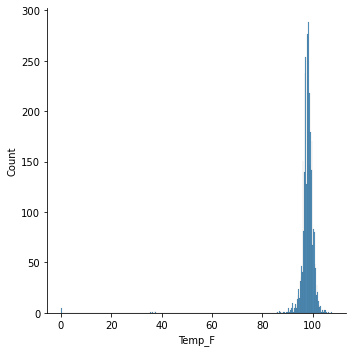

In [445]:
sns.displot(data = v4, x = "Temp_F")

In [455]:
v4.describe()

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
count,3471.0,3454.0,3470.0,3468.0,3431.0,3360.0,3360.0
mean,14342.5102276001143764,18401.6907932831491053,88.6688760806916463,19.331891580161475,97.7539551461691474,122.3723214285714249,59.6196428571428569
std,8427.36903733696817653,11442.08996002380263235,21.21118222888692273,6.7579391248118075,4.9060138850054136,33.8517565104496541,17.7176080799204243
min,3.0,4.0,29.0,0.0,0.0,0.0,0.0
25%,7149.5,8957.25,74.0,15.0,97.0,104.0,50.0
50%,14315.0,17961.5,87.0,18.0,98.0,122.0,59.0
75%,21370.5,26736.25,102.0,23.0,99.09999847412112217,142.0,70.0
max,32763.0,47473.0,217.0,98.0,107.5999984741211222,237.0,197.0


In [465]:
v4["Temp_F"].replace({0 : v4["Temp_F"].mean()}, inplace = True)

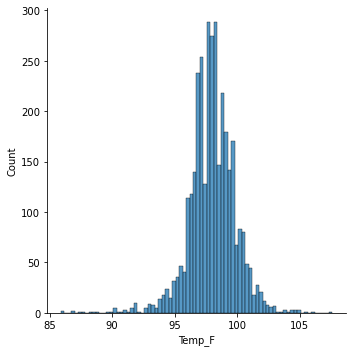

In [481]:
sns.displot(data = v4, x = "Temp_F")

In [469]:
v4[v4["Temp_F"] <= 80].index

Int64Index([47, 1088, 1816, 2021, 2065, 3417], dtype='int64')

In [478]:
for i in v4[v4["Temp_F"] <= 80].index:
    v4.at[i,"Temp_F"] = 97.75

In [479]:
v4[v4["Temp_F"] <= 80]

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg


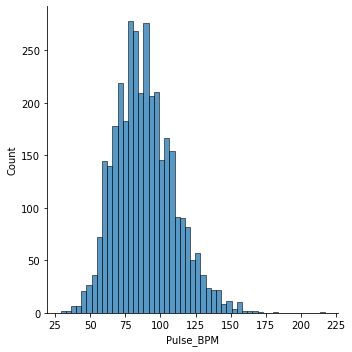

In [482]:
sns.displot(data = v4, x = "Pulse_BPM")

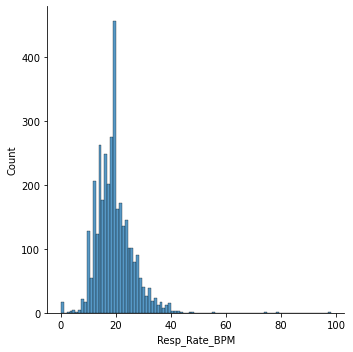

In [483]:
sns.displot(data = v4, x = "Resp_Rate_BPM")

In [486]:
v4[v4["Resp_Rate_BPM"] > 25]

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
8,67,76.0,87.0,28.0,96.5,138.0,70.0
13,149,184.0,86.0,34.0,97.1999969482422017,131.0,70.0
16,148,183.0,101.0,36.0,100.0,104.0,54.0
21,261,322.0,149.0,28.0,100.6999969482422017,NaN,NaN
28,311,377.0,60.0,30.0,96.9000015258788778,83.0,43.0
...,...,...,...,...,...,...,...
3448,32260,46935.0,132.0,31.0,98.5999984741211222,100.0,65.0
3453,32529,47225.0,99.0,30.0,NaN,134.0,62.0
3454,32591,47286.0,73.0,26.0,92.0,104.0,31.0
3458,32489,47180.0,129.0,26.0,97.40000152587887783,NaN,NaN


<AxesSubplot:>

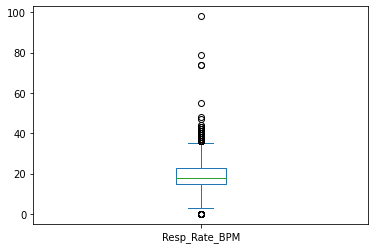

In [492]:
v4["Resp_Rate_BPM"].plot(kind = "box")

<AxesSubplot:>

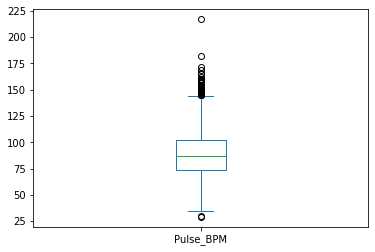

In [493]:
v4["Pulse_BPM"].plot(kind = "box")

<AxesSubplot:>

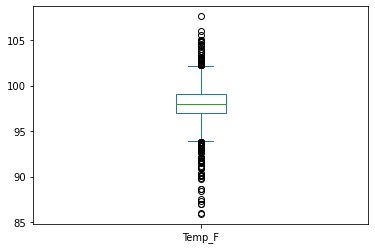

In [494]:
v4["Temp_F"].plot(kind = "box")

<AxesSubplot:>

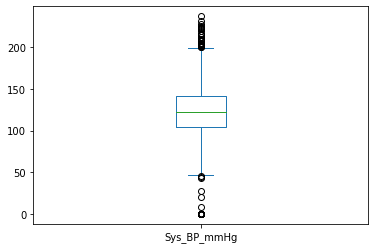

In [495]:
v4["Sys_BP_mmHg"].plot(kind = "box")

<AxesSubplot:>

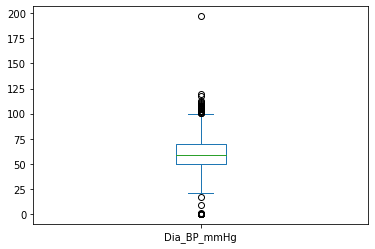

In [496]:
v4["Dia_BP_mmHg"].plot(kind = "box")

Data Cleaning:
    
    Temperature_F ; values of around 35 to be replaced by mean of the temperature, as 35 deg F is not possible, because 
    below 95 deg F is hypothermia condition
    
    Pulse (Heart) Rate ; 60 to 100 for normall a/c hopskin medical, and 60 to 80 a/c to cleaveland clinic
    so we'll drop/replace values > 150
    
    Respiratory Rates ; 12 to 16 breaths per min a/c to hopskin for normal person, 12 to 25 a/c to cleaveland clinic
    so we'll drop/replace values >50
    
    Systolic BP; drop below 60 and above 200
    
    Diastolic BP; drop below 30 and above 110
    
    
    

In [503]:
v4[v4["Sys_BP_mmHg"] < 70].tail()

,subject_id,icustay_id,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
3379,29732,44165.0,101.0,22.0,96.40000152587887783,66.0,39.0
3394,30469,44955.0,95.0,16.0,101.3000030517577983,69.0,49.0
3403,30817,45337.0,45.0,22.0,94.40000152587887783,0.0,0.0
3446,32246,46919.0,93.0,16.0,97.8000030517577983,0.0,0.0
3465,32705,47415.0,149.0,25.0,102.0,0.0,0.0
